## 1) Importing libraries

In [ ]:
#pip install Keras==2.3.1 tensorflow==2.1.0

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_style("whitegrid")
sns.set_palette("GnBu_d")

## 2) Data Preparation

In [ ]:
eurtnd=pd.read_csv("/content/drive/My Drive/eurtnd.csv")

In [ ]:
eurtnd.dropna(inplace=True)

In [ ]:
eurtnd.head()

,Date,Dernier Prix,Date.1,Dernier Prix.1
0,7/22/2020,3.2330,7/22/2020,2.8054
1,7/21/2020,3.2313,7/21/2020,2.8050
2,7/20/2020,3.2213,7/20/2020,2.8122
3,7/19/2020,3.2304,7/17/2020,2.8196
4,7/17/2020,3.2284,7/16/2020,2.8243


In [ ]:
eurtnd=eurtnd[["Date","Dernier Prix.1"]]
eurtnd=eurtnd.reindex(index=eurtnd.index[::-1])
date=pd.to_datetime(eurtnd.Date, format='%m/%d/%Y')
date=date.values

In [ ]:
eurtnd['diff']=eurtnd['Dernier Prix.1'].diff()

------------------

In [ ]:
eurmad=pd.read_csv("/content/drive/My Drive/currencydata/eurmad10.csv")
eurtnd=pd.read_csv("/content/drive/My Drive/currencydata/eurtnd10.csv")
usdmad=pd.read_csv("/content/drive/My Drive/currencydata/usdmad10.csv")
usdtnd=pd.read_csv("/content/drive/My Drive/currencydata/usdtnd10.csv")
eurusd=pd.read_csv("/content/drive/My Drive/currencydata/eurusd10.csv")

eurusd.drop('Variation %', axis=1, inplace=True)
eurtnd.drop('Variation %', axis=1, inplace=True)
usdtnd.drop('Variation %', axis=1, inplace=True)
eurmad.drop('Variation %', axis=1, inplace=True)
usdmad.drop('Variation %', axis=1, inplace=True)

eurmad=eurmad.reindex(index=eurmad.index[::-1])
eurtnd=eurtnd.reindex(index=eurtnd.index[::-1])
usdmad=usdmad.reindex(index=usdmad.index[::-1])
usdtnd=usdtnd.reindex(index=usdtnd.index[::-1])
eurusd=eurusd.reindex(index=eurusd.index[::-1])

date=pd.to_datetime(eurmad.Date, format='%d/%m/%Y')
date=date.values

eurmad.Date = pd.to_datetime(eurmad.Date, format='%d/%m/%Y')
eurtnd.Date = pd.to_datetime(eurtnd.Date, format='%d/%m/%Y')
usdmad.Date = pd.to_datetime(usdmad.Date, format='%d/%m/%Y')
usdtnd.Date = pd.to_datetime(usdtnd.Date, format='%d/%m/%Y')
eurusd.Date = pd.to_datetime(eurusd.Date, format='%d/%m/%Y')

eurmad.set_index('Date', inplace=True)
eurtnd.set_index('Date', inplace=True)
usdmad.set_index('Date', inplace=True)
usdtnd.set_index('Date', inplace=True)
eurusd.set_index('Date', inplace=True)

eurusd= eurusd.astype(str)
eurtnd= eurtnd.astype(str)
eurmad= eurmad.astype(str)
usdtnd= usdtnd.astype(str)
usdmad= usdmad.astype(str)

for i in eurusd.columns:
    eurusd[i]= eurusd[i].str.replace(',', '.').astype(float)
    eurtnd[i]= eurtnd[i].str.replace(',', '.').astype(float)
    eurmad[i]= eurmad[i].str.replace(',', '.').astype(float)
    usdtnd[i]= usdtnd[i].str.replace(',', '.').astype(float)
    usdmad[i]= usdmad[i].str.replace(',', '.').astype(float)

In [ ]:
eurtnd['diff']=eurtnd['Dernier Prix'].diff()

In [ ]:
eurtnd.tail()

,Dernier,Ouv.,Plus Haut,Plus Bas,diff
Date,,,,,
2020-07-20,3.2278,3.2271,3.2624,3.2074,0.0003
2020-07-21,3.2276,3.2294,3.2524,3.2084,-0.0002
2020-07-22,3.2327,3.2274,3.2606,3.2087,0.0051
2020-07-23,3.2240,3.2341,3.2589,3.2043,-0.0087
2020-07-24,3.2290,3.2243,3.2506,3.2040,0.0050


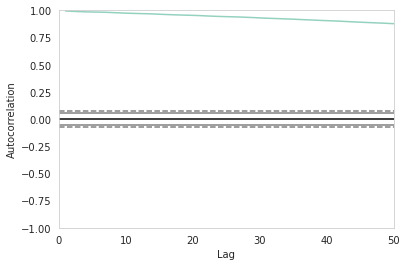

In [ ]:
from pandas.plotting import autocorrelation_plot
plt.figsize=(20,10)
ax = autocorrelation_plot(eurtnd['Dernier Prix'])
ax.set_xlim([0, 50])
plt.show()

In [ ]:
eurtnd["Dernier Prix.1"].autocorr(lag=1)

0.9992407498411989

In [ ]:
from statsmodels.tsa.stattools import adfuller
adfuller(X)
#data is non stationary

In [ ]:
#X=eurtnd["Plus Haut"].values
#X=usdtnd["Plus Haut"].values
#X=eurmad["Plus Haut"].values
#X=usdmad["Plus Haut"].values
#X=eurusd["Plus Haut"].values

In [ ]:
eurtnd.head()

,Date,Dernier Prix.1
1298,10/11/2016,1.9685
1297,10/12/2016,1.9520
1296,10/13/2016,1.9548
1295,10/14/2016,1.9674
1294,10/15/2016,1.9754


In [ ]:
eurtnd["Dernier Prix"]=eurtnd["Dernier Prix.1"]
eurtnd.drop("Dernier Prix.1",axis=1,inplace=True)

In [ ]:
Y=eurtnd["Dernier Prix"].iloc[350:].values
#Y=Y[int(len(Y)*0.5):]

In [ ]:
from scipy.signal import savgol_filter
#X = savgol_filter(X, 25, 3) 

In [ ]:
eutn=pd.read_csv("/content/drive/My Drive/eurtnd.csv")
eutn=eutn[["Date","Dernier Prix"]]
eutn=eutn.reindex(index=eutn.index[::-1])
date=pd.to_datetime(eutn.Date, format='%m/%d/%Y')
Y2=eutn["Dernier Prix"].iloc[350:].values
from scipy.signal import savgol_filter
Y_smooth = savgol_filter(Y2, 13, 3) 

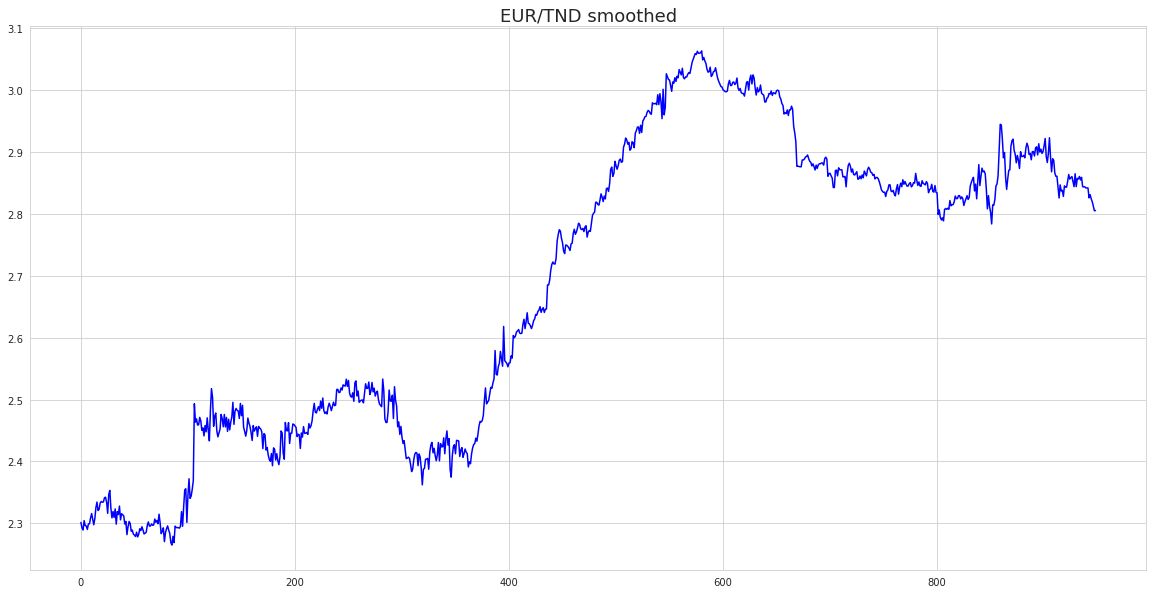

In [ ]:
plt.figure(figsize=(20,10))
plt.title("EUR/TND smoothed",fontsize=18)
plt.plot(Y_smooth,c="blue")

In [ ]:
plt.figure(figsize=(20,10))
ax=test.plot(color='red', figsize=(20,10))
    #plt.plot(ts, color='red',label='Real rate')
predicted.plot(color='blue',label='Predicted rate',ax=ax)
plt.title('Real VS Prediction (Smoothed)',fontsize=18)
plt.xlabel('Time',fontsize=15)
plt.ylabel('EUR/TND',fontsize=15)
plt.legend()
plt.show()

In [ ]:

X=eurtnd["Dernier Prix"].iloc[350:].values

size = int(len(X) * 0.66)

eurtnd["Dernier Prix"]=savgol_filter(eurtnd["Dernier Prix"].to_numpy(),5,3)
eurtnd['target']=eurtnd["Dernier Prix"]
eurtnd['target_previous']=eurtnd["Dernier Prix"].shift(1)
eurtnd['diff']=(eurtnd['target']-eurtnd['target_previous'])*1000/eurtnd['target']
target_previous=X[size:len(X)]
X=eurtnd["diff"].iloc[350:].values

#########
rft = np.fft.rfft(X,500)
#X = np.fft.irfft(rft,500)
#X=X[int(len(X)*0.5):]
#test0=X[size-10:len(X)]
from scipy.signal import savgol_filter
#X = savgol_filter(X, 25, 3) 

In [ ]:
train, test = X[0:size], X[size-10:len(X)]
ydate=date[size:len(X)]

In [ ]:
# n = 200
# nfft = n

# t = np.linspace(0, 0.1, n)
# yf = np.fft.fftshift(np.fft.fft(X, nfft))
# f = np.fft.fftshift(np.fft.fftfreq(nfft, np.mean(np.diff(t))))

# plt.plot(f, abs(yf))
# plt.grid()
# plt.xlim([-100, 100])

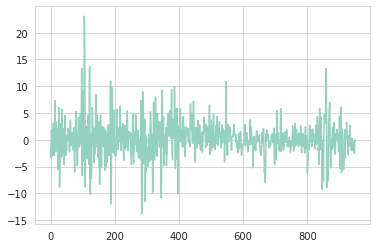

In [ ]:
#plt.plot(X)
plt.plot(X)
plt.show()

In [ ]:
fft_list = np.asarray(np.fft.fft(np.asarray(X)))
for num_ in [500]:
     eurtnd['invfft'+str(num_)]= np.copy(fft_list); eurtnd['invfft'+str(num_)][num_:-num_]=0
     eurtnd['invfft'+str(num_)]=np.real(np.fft.ifft(eurtnd['invfft'+str(num_)]))

In [ ]:
X=X[1:]

In [ ]:
def best_order(series, max_order):
    m=1
    best=1
    for i in range(max_order):
        if i==0: 
            continue
        else:
            r=series.autocorr(lag=i)
            if r<m and r>0.95:
                m=r
                best=i
    return best
lag=best_order(eurtnd["Dernier Prix"].iloc[1:],100)

In [ ]:
lag=best_order(pd.Series(X),100)

In [ ]:
X_train = []
y_train = []
n=len(train)
for i in range(lag,n):
    X_train.append(train[i-lag:i])
    y_train.append(train[i])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1],1))

In [ ]:
X_val = []
y_val = []
n=len(train)
for i in range(lag,len(test)):
    X_val.append(test[i-lag:i])
    y_val.append(test[i])
X_val, y_val = np.array(X_val), np.array(y_val)
X_val = np.reshape(X_val, (X_val.shape[0], X_val.shape[1],1))

In [ ]:
X_test = []
y_test=[]
for i in range(len(train)+1,len(X)):
    X_test.append(X[i-lag:i])
    y_test.append(X[i])
X_test = np.array(X_test)
y_test=np.array(y_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))


## 3) Deep Learning

In [ ]:
import tensorflow as tf
from keras.callbacks import ModelCheckpoint
from keras.models import Model, load_model, Sequential
from keras.layers import Dense, Activation, Dropout, Input, Masking, TimeDistributed, LSTM, Conv1D
from keras.layers import GRU, SimpleRNN, Bidirectional, BatchNormalization, Reshape
from keras.optimizers import Adam, SGD, RMSprop

### a. Training

In [ ]:
def ret_opt(name, rate):
  opt=Adam(learning_rate=rate, beta_1=0.9, beta_2=0.99, epsilon=1e-07, amsgrad=False)
  opt2=SGD(lr=rate, decay=1e-7, momentum=0.95, nesterov=True)
  opt3 = RMSprop(learning_rate=rate, rho=0.9, momentum=0.0, epsilon=1e-07)
  if name=="adam":
    return opt
  elif name=="SGD":
    return opt2
  elif name=="rmsprop":
    return opt3

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_loss')<2e-04) and (epoch>6) and (logs.get('val_loss')<7e-04):
      print("Training stopped")
      self.model.stop_training = True
callbacks=myCallback()

class myCallback2(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if (logs.get('loss')<5e-04) and (epoch>3) and (logs.get('val_loss')<7e-04):
      print("Training stopped")
      self.model.stop_training = True
callbacks2=myCallback2()

Model 1: Simple GRU

In [ ]:
def GRUmodel(nb_units, nb_epochs, batches, name, rate):
  model = Sequential()
  model.add(GRU(units=nb_units, return_sequences=False,input_shape=(X_train.shape[1],X_train.shape[2])))
  model.add(Dense(units=1))
  model.compile(optimizer=ret_opt(name, rate) ,loss='mean_squared_error')
  history=model.fit(X_train, y_train, validation_data=(X_val,y_val), batch_size=batches, epochs=nb_epochs, callbacks=[callbacks2])
  val_loss=history.history['val_loss']
  loss=history.history['loss']
  pred=model.predict(X_test)
  rmse = math.sqrt(mean_squared_error(test[10:-1],pred))
  return loss, val_loss,rmse

In [ ]:
loss, val_loss, rmse=GRUmodel(200,20,10,"adam",0.01)

Epoch 1/20
85/85 [==============================] - 2s 18ms/step - loss: 0.1386 - val_loss: 7.5857e-04
Epoch 2/20
85/85 [==============================] - 1s 14ms/step - loss: 0.0014 - val_loss: 6.7810e-04
Epoch 3/20
85/85 [==============================] - 1s 14ms/step - loss: 0.0018 - val_loss: 0.0075
Epoch 4/20
85/85 [==============================] - 1s 14ms/step - loss: 0.0024 - val_loss: 0.0014
Epoch 5/20
85/85 [==============================] - 1s 14ms/step - loss: 0.0022 - val_loss: 0.0018
Epoch 6/20
85/85 [==============================] - 1s 15ms/step - loss: 0.0030 - val_loss: 4.2175e-04
Epoch 7/20
85/85 [==============================] - 1s 14ms/step - loss: 0.0039 - val_loss: 0.0032
Epoch 8/20
85/85 [==============================] - 1s 14ms/step - loss: 0.0032 - val_loss: 0.0027
Epoch 9/20
85/85 [==============================] - 1s 14ms/step - loss: 0.0030 - val_loss: 3.2540e-04
Epoch 10/20
85/85 [==============================] - 1s 14ms/step - loss: 0.0026 - val_loss: 

<Figure size 1440x720 with 0 Axes>

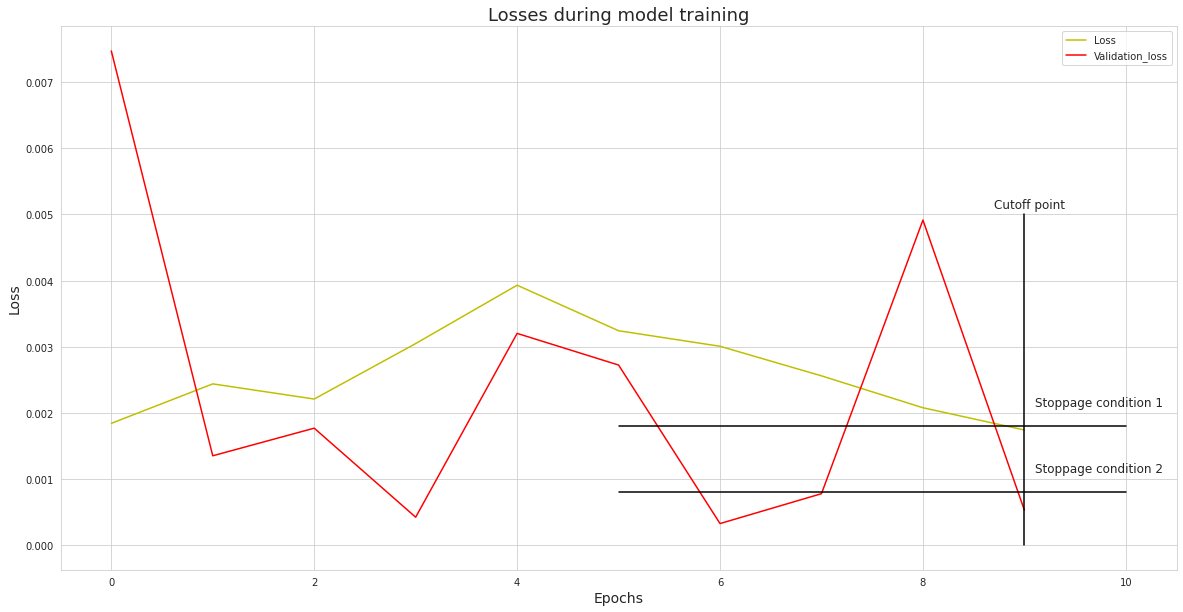

In [ ]:
a=pd.DataFrame(loss[2:],columns=["Loss"])
b=pd.DataFrame(val_loss[2:],columns=["Validation_loss"])

plt.figure(figsize=(20,10))
ax=a.plot(color="y",figsize=(20,10))
b.plot(color='r',ax=ax)
plt.plot([5,10],[0.0018,0.0018],color="black")
plt.plot([5,10],[0.0008,0.0008],color="black")
plt.plot([9,9],[0,0.005],color="black")

plt.text(9.1, 0.0011, "Stoppage condition 2",fontsize=12)
plt.text(9.1, 0.0021, "Stoppage condition 1",fontsize=12)
plt.text(8.7, 0.0051, "Cutoff point",fontsize=12)
plt.title("Losses during model training",fontsize=18)
plt.xlabel("Epochs",fontsize=14)
plt.ylabel("Loss",fontsize=14)

plt.show()

Model 2: Simple LSTM

In [ ]:
def LSTMmodel(nb_units, nb_epochs, batches, name, rate):
  model = Sequential()
  model.add(LSTM(units=nb_units, return_sequences=False,input_shape=(X_train.shape[1],X_train.shape[2])))
  model.add(Dense(units=1))
  model.compile(optimizer=ret_opt(name, rate) ,loss='mean_squared_error')
  history=model.fit(X_train, y_train, validation_data=(X_val,y_val), batch_size=batches, epochs=nb_epochs, callbacks=[callbacks2])
  val_loss=history.history['val_loss']
  loss=history.history['loss']
  pred=model.predict(X_test)
  rmse = math.sqrt(mean_squared_error(test[10:-1],pred))
  return loss, val_loss,rmse

Model 3: Two layer GRU

In [ ]:
def TwoGRU(nb_units, nb_units2, nb_epochs, batches, name, rate):
  model = Sequential()
  model.add(GRU(units=nb_units, return_sequences=True,input_shape=(X_train.shape[1],X_train.shape[2])))
  model.add(GRU(units=nb_units2, return_sequences=False,input_shape=(X_train.shape[1],X_train.shape[2])))
  model.add(Dense(units=1))
  model.compile(optimizer=ret_opt(name, rate) ,loss='mean_squared_error')
  history=model.fit(X_train, y_train, validation_data=(X_val,y_val), batch_size=batches, epochs=nb_epochs, callbacks=[callbacks2])
  val_loss=history.history['val_loss']
  loss=history.history['loss']
  pred=model.predict(X_test)
  rmse = math.sqrt(mean_squared_error(test[10:-1],pred))
  return loss, val_loss,rmse

Model 4: GRU+Dense

In [ ]:
def GRUdense(nb_units, nb_dense, nb_epochs, batches, name, rate):
  model = Sequential()
  model.add(GRU(units=nb_units, return_sequences=False,input_shape=(X_train.shape[1],X_train.shape[2])))
  model.add(Dense(units=nb_dense))
  model.add(Dense(units=1))
  model.compile(optimizer=ret_opt(name, rate) ,loss='mean_squared_error')
  history=model.fit(X_train, y_train, validation_data=(X_val,y_val), batch_size=batches, epochs=nb_epochs, callbacks=[callbacks2])
  val_loss=history.history['val_loss']
  loss=history.history['loss']
  pred=model.predict(X_test)
  rmse = math.sqrt(mean_squared_error(test[10:-1],pred))
  return loss, val_loss,rmse,pred

In [ ]:
unit_list=[10,30,50,100,200]
dense_list=[5,10,20,30]
batch_list=[5,10,20,50]
epochs=20
rates=[0.1,0.05,0.01]

In [ ]:
models=[GRUmodel, LSTMmodel, TwoGRU, GRUdense]

Optimizing by unit number

In [ ]:
gru=[]
lstm=[]
twogru=[]
grudense=[]

for nb_units in unit_list:
  gru.append(GRUmodel(nb_units, epochs, 10, "adam", 0.01))
  lstm.append(LSTMmodel(nb_units, epochs, 10, "adam", 0.01))


for nb_units in unit_list:
  for nb_units2 in unit_list:
    twogru.append(TwoGRU(nb_units, nb_units2, epochs, 10, "adam", 0.01))

for nb_units in unit_list:
  for nb_dense in dense_list:
    grudense.append(GRUdense(nb_units, nb_dense, epochs, 10, "adam", 0.01))

results=[gru,lstm,twogru,grudense]

In [ ]:
for nb_units in unit_list:
  for nb_dense in dense_list:
    grudense.append(GRUdense(nb_units, nb_dense, epochs, 10, "adam", 0.01))

In [ ]:
gru=results[0]
lstm=results[1]
twogru=results[2]
grudense=results[3]

In [ ]:
d=[g[2] for g in gru]
grudf=pd.DataFrame(d,index=unit_list)

d=[g[2] for g in lstm]
lstmdf=pd.DataFrame(d,index=unit_list)



un=[unit_list[i//len(unit_list)] for i in range(len(unit_list)*5)]
un2=[unit_list[i%len(unit_list)] for i in range(len(unit_list)*5)]
arrays=[un,un2]
tuples = list(zip(*arrays))
index = pd.MultiIndex.from_tuples(tuples, names=['nb units', 'nb units2'])

d=[g[2] for g in twogru]
twogrudf=pd.DataFrame(d,index=index)



un=[unit_list[i//4] for i in range(len(unit_list)*4)]
un2=[dense_list[i%len(dense_list)] for i in range(len(dense_list)*5)]
arrays=[un,un2]
tuples = list(zip(*arrays))
index = pd.MultiIndex.from_tuples(tuples, names=['nb units', 'nb dense'])

d=[g[2] for g in grudense]
grudensedf=pd.DataFrame(d[20:],index=index)

In [ ]:
len(grudense)

40

In [ ]:
grudf.to_csv("grudf.csv")
lstmdf.to_csv("lstmdf.csv")
twogrudf.to_csv("twogrudf.csv")
grudensedf.to_csv("grudensedf.csv")

In [ ]:
grudf=pd.read_csv("grudf.csv")
lstmdf=pd.read_csv("lstmdf.csv")
twogrudf=pd.read_csv("twogrudf.csv")
grudensedf=pd.read_csv("grudensedf.csv")

In [ ]:
pd.MultiIndex.from_tuples(tuples, names=['nb units', 'nb dense'])


MultiIndex([( 10,  5),
            ( 10, 10),
            ( 10, 20),
            ( 10, 30),
            ( 30,  5),
            ( 30, 10),
            ( 30, 20),
            ( 30, 30),
            ( 50,  5),
            ( 50, 10),
            ( 50, 20),
            ( 50, 30),
            (100,  5),
            (100, 10),
            (100, 20),
            (100, 30),
            (200,  5),
            (200, 10),
            (200, 20),
            (200, 30)],
           names=['nb units', 'nb dense'])

In [ ]:
grudensedf

,nb units,nb dense,0
0,10,5,0.024415
1,10,10,0.139449
2,10,20,0.085339
3,10,30,0.032132
4,30,5,0.068856
5,30,10,0.021201
6,30,20,0.054362
7,30,30,0.157322
8,50,5,0.058227
9,50,10,0.089608


Best optimizer

In [ ]:
gru2=[]
lstm2=[]
twogru2=[]
grudense2=[]
names=["adam","SGD","rmsprop"]
name="adam"
for rate in rates[:]:
  gru2.append(GRUmodel(30, epochs, 10, name, rate))
  lstm2.append(LSTMmodel(10, epochs, 10, name, rate))
  twogru2.append(TwoGRU(200,30, epochs, 10, name, rate))
  grudense2.append(GRUdense(30,10, epochs, 10, name, rate))

results2=[gru2,lstm2,twogru2,grudense2]

Epoch 1/20
63/63 [==============================] - 1s 8ms/step - loss: 0.2291 - val_loss: 0.0726
Epoch 2/20
63/63 [==============================] - 0s 2ms/step - loss: 0.1095 - val_loss: 0.0766
Epoch 3/20
63/63 [==============================] - 0s 2ms/step - loss: 0.1117 - val_loss: 0.0864
Epoch 4/20
63/63 [==============================] - 0s 2ms/step - loss: 0.1405 - val_loss: 0.0653
Epoch 5/20
63/63 [==============================] - 0s 2ms/step - loss: 0.1107 - val_loss: 0.0602
Epoch 6/20
63/63 [==============================] - 0s 3ms/step - loss: 0.0949 - val_loss: 0.0720
Epoch 7/20
63/63 [==============================] - 0s 3ms/step - loss: 0.1173 - val_loss: 0.0717
Epoch 8/20
63/63 [==============================] - 0s 3ms/step - loss: 0.1040 - val_loss: 0.0593
Epoch 9/20
63/63 [==============================] - 0s 2ms/step - loss: 0.1019 - val_loss: 0.0638
Epoch 10/20
63/63 [==============================] - 0s 2ms/step - loss: 0.1131 - val_loss: 0.0678
Epoch 11/20
63/63 [

In [ ]:
len(gru2)

3

In [ ]:
un=[names[i//4] for i in range(len(names)*4)]
un2=[rates[i%len(rates)] for i in range(len(rates)*4)]
arrays=[un,un2]
tuples = list(zip(*arrays))
index = pd.MultiIndex.from_tuples(tuples, names=['optimizer', 'learning rate'])


d=[g[2] for g in gru2]
grudf2=pd.DataFrame(d,index=rates)

d=[g[2] for g in lstm2]
lstmdf2=pd.DataFrame(d,index=rates)

d=[g[2] for g in twogru2]
twogrudf2=pd.DataFrame(d,index=rates)

d=[g[2] for g in grudense2]
grudensedf2=pd.DataFrame(d,index=rates)

In [ ]:
grudf2.to_csv("grudf2.csv")
lstmdf2.to_csv("lstmdf2.csv")
twogrudf2.to_csv("twogrudf2.csv")
grudensedf2.to_csv("grudensedf2.csv")

In [ ]:
grudensedf2

,0
0.10,0.078043
0.05,0.087717
0.01,0.104047


In [ ]:
a=[]
a.append(GRUmodel(30, epochs, 10, name, 0.05))
a.append(LSTMmodel(10, epochs, 10, name, 0.05))
a.append(TwoGRU(200,30, epochs, 10, name, 0.05))
a.append(GRUdense(30,10, epochs, 10, name, 0.1))




In [ ]:
[aa[2] for aa in a]

[0.10542438332776043,
 0.05060863582042278,
 0.13616871217589332,
 0.1354831484682136]

In [ ]:
a,b,c,pred=GRUdense(50,10, epochs, 10, name, 0.01)

Epoch 1/20
84/84 [==============================] - 1s 15ms/step - loss: 0.2314 - val_loss: 0.0136
Epoch 2/20
84/84 [==============================] - 1s 10ms/step - loss: 0.0028 - val_loss: 0.0031
Epoch 3/20
84/84 [==============================] - 1s 11ms/step - loss: 7.4846e-04 - val_loss: 1.6276e-04
Epoch 4/20
84/84 [==============================] - 1s 11ms/step - loss: 4.2549e-04 - val_loss: 2.4737e-04
Epoch 5/20
84/84 [==============================] - 1s 11ms/step - loss: 4.5145e-04 - val_loss: 9.4045e-04
Epoch 6/20
84/84 [==============================] - 1s 11ms/step - loss: 7.1578e-04 - val_loss: 2.6541e-04
Epoch 7/20
84/84 [==============================] - 1s 11ms/step - loss: 0.0011 - val_loss: 5.4977e-04
Epoch 8/20
84/84 [==============================] - 1s 11ms/step - loss: 9.5731e-04 - val_loss: 9.8678e-04
Epoch 9/20
84/84 [==============================] - 1s 10ms/step - loss: 8.3443e-04 - val_loss: 4.6926e-04
Epoch 10/20
84/84 [==============================] - 1s 1

In [ ]:
model = Sequential()
# First LSTM layer
model.add(GRU(units=30, return_sequences=False,input_shape=(X_train.shape[1],X_train.shape[2])))
#model.add(Bidirectional(LSTM(units=30, return_sequences=False), input_shape=(X_train.shape[1],X_train.shape[2])))
#model.add(Dropout(0.2))
#model.add(LSTM(units=30,return_sequences=False))
#model.add(Dropout(0.2))
model.add(Dense(units=10))
# The output layer
model.add(Dense(units=1))
opt=Adam(
    learning_rate=0.01,
    beta_1=0.9,
    beta_2=0.99,
    epsilon=1e-07,
    amsgrad=False,
    name="Adam")
##Best params beta1 0.9 beta2 0.99 25 epochs

opt2=SGD(lr=0.001, decay=1e-7, momentum=0.95, nesterov=True)
##Best params momentum 0.9 nesterov True.''

opt3 = RMSprop(learning_rate=0.1, rho=0.9, momentum=0.0, epsilon=1e-07)

model.compile(optimizer=opt ,loss='mean_absolute_error')

In [ ]:
model.fit(X_train, y_train, validation_data=(X_val,y_val), batch_size=10, epochs=10, callbacks=[callbacks2])

Epoch 1/10
63/63 [==============================] - 1s 8ms/step - loss: 2.4197 - val_loss: 1.7092
Epoch 2/10
63/63 [==============================] - 0s 3ms/step - loss: 2.3884 - val_loss: 1.7150
Epoch 3/10
63/63 [==============================] - 0s 3ms/step - loss: 2.3971 - val_loss: 1.6772
Epoch 4/10
63/63 [==============================] - 0s 3ms/step - loss: 2.3898 - val_loss: 1.7493
Epoch 5/10
63/63 [==============================] - 0s 3ms/step - loss: 2.4052 - val_loss: 1.6785
Epoch 6/10
63/63 [==============================] - 0s 3ms/step - loss: 2.3914 - val_loss: 1.6589
Epoch 7/10
63/63 [==============================] - 0s 3ms/step - loss: 2.3928 - val_loss: 1.6617
Epoch 8/10
63/63 [==============================] - 0s 3ms/step - loss: 2.4049 - val_loss: 1.6652
Epoch 9/10
63/63 [==============================] - 0s 3ms/step - loss: 2.3874 - val_loss: 1.6607
Epoch 10/10
63/63 [==============================] - 0s 3ms/step - loss: 2.4010 - val_loss: 1.6771


In [ ]:
model.save_weights("/content/drive/My Drive/currencydata/LSTM+Dense Univariate Adam dummy.h5")

### b. Long term forecasting

In [ ]:
X_test = []
y_test=[]
for i in range(len(train)+1,len(X)):
    X_test.append(X[i-lag:i])
    y_test.append(X[i])
X_test = np.array(X_test)
y_test=np.array(y_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))


In [ ]:
pred2 = model.predict(X_test)

In [ ]:
p=[]
x=X[size]
for elt in pred2:
  p.append(x+elt)
  x+=elt

In [ ]:
t=[]
x=X[size]
for elt in test[10:]:
  t.append(x+elt)
  x+=elt

In [ ]:
predp=pd.DataFrame(pred2, columns = ['Prediction'])
predp["Date"]=date[size+1:len(X)]
predp.set_index('Date', inplace=True)

ts=pd.DataFrame(test[10:], columns = ['Real Rate'])
ts["Date"]=date[size:len(X)]
ts.set_index('Date', inplace=True)

In [ ]:
ts.tail()

,Real Rate
Date,
NaT,-0.396336
NaT,-2.460897
NaT,-2.537254
NaT,-2.337448
NaT,0.028008


In [ ]:
import math
from sklearn.metrics import mean_squared_error

# Some functions to help out with
def plot_predictions(test,predicted):
    plt.figure(figsize=(20,10))
    ax=test.plot(color='red', figsize=(20,10))
    #plt.plot(ts, color='red',label='Real rate')
    predicted.plot(color='blue',label='Predicted rate',ax=ax)
    plt.title('Real VS Prediction USD/MAD',fontsize=18)
    plt.xlabel('Time',fontsize=15)
    plt.ylabel('USD/TND',fontsize=15)
    plt.legend()
    plt.show()

def return_rmse(test,predicted):
    rmse = math.sqrt(mean_squared_error(test, predicted))
    print("The root mean squared error is {}.".format(rmse))

In [ ]:
plot_predictions(ts,predp)

In [ ]:
len(target_previous[size:])

In [ ]:
test.shape[0]

In [ ]:
import math
from sklearn.metrics import mean_squared_error
return_rmse(test[10:-1],pred2[:])

#### From variation to values

In [ ]:
len(target_previous)

In [ ]:
#target_previous=eurtnd['target_previous'].tolist()
p = (pred2[:,0]*target_previous[:-1])/1000 +target_previous[:-1]
pre=pd.DataFrame(p, columns = ['Prediction'])
pre["Date"]=date[+size+1:len(X)]
pre.set_index('Date', inplace=True)

In [ ]:
pre=pd.DataFrame(p, columns = ['Prediction'])
pre["Date"]=date[+size+1:len(X)]
pre.set_index('Date', inplace=True)


t2=pd.DataFrame(Y[size:len(X)], columns = ['Real Rate'])
t2["Date"]=date[size:len(X)]
t2.set_index('Date', inplace=True)

In [ ]:
plot_predictions(t2,pre)

In [ ]:
return_rmse(Y[size+1:len(X)],p[:])

### d. One-by-one prediction

In [ ]:
pred=[]
X2=X_train
y2=y_train
for i in range(len(X_test)-1):
  model.reset_states() 
  x=X_test[i]
  x=x[..., np.newaxis]
  x = np.array(x)
  x = np.reshape(x, (1,x.shape[0],x.shape[1]))
  np.append(X2,x,axis=0)
  X2=X2[1:]

  y=y_test[i]
  y=y[..., np.newaxis]
  y = np.array(y)

  np.append(y2,y,axis=0)
  y2=y2[1:]
  #model.fit(x,np.reshape(np.array(y_test[i]),(1,1)) , epochs=3)
  model.fit(X2,y2,epochs=15, callbacks=[callbacks2])

  x=X_test[i+1]
  x=x[..., np.newaxis]
  x = np.array(x)
  x = np.reshape(x, (1,x.shape[0],x.shape[1]))
  pred.append(model.predict(x))

Epoch 1/15
20/20 [==============================] - 0s 1ms/step - loss: 2.4148
Epoch 2/15
20/20 [==============================] - 0s 1ms/step - loss: 2.3879
Epoch 3/15
20/20 [==============================] - 0s 1ms/step - loss: 2.3724
Epoch 4/15
20/20 [==============================] - 0s 1ms/step - loss: 2.3745
Epoch 5/15
20/20 [==============================] - 0s 1ms/step - loss: 2.3750
Epoch 6/15
20/20 [==============================] - 0s 1ms/step - loss: 2.3781
Epoch 7/15
20/20 [==============================] - 0s 1ms/step - loss: 2.3823
Epoch 8/15
20/20 [==============================] - 0s 1ms/step - loss: 2.3788
Epoch 9/15
20/20 [==============================] - 0s 1ms/step - loss: 2.3768
Epoch 10/15
20/20 [==============================] - 0s 1ms/step - loss: 2.3803
Epoch 11/15
20/20 [==============================] - 0s 1ms/step - loss: 2.3820
Epoch 12/15
20/20 [==============================] - 0s 1ms/step - loss: 2.3790
Epoch 13/15
20/20 [==============================

KeyboardInterrupt: ignored

In [ ]:
pred=[pred[i][0][0] for i in range(len(pred))]

<Figure size 1440x720 with 0 Axes>

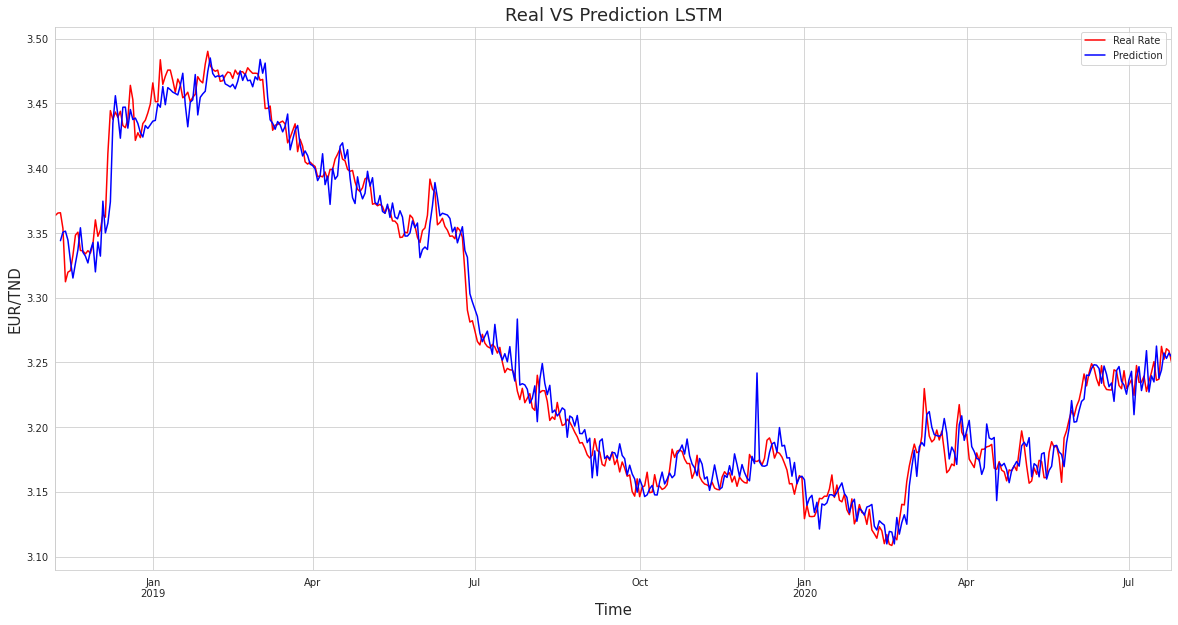

In [ ]:
pred1p=pd.DataFrame(pred, columns = ['Prediction'])
pred1p["Date"]=date[len(X)+size+2:2*len(X)]
pred1p.set_index('Date', inplace=True)

plot_predictions(ts,pred1p)

In [ ]:
import math
from sklearn.metrics import mean_squared_error
return_rmse(test[:-2],pred)

The root mean squared error is 0.011002053571719267.
